***
# <font color=green size=10>CURSO DE ESTATÍSTICA - PARTE 1</font>
***

## Trabalho de Análise Descritiva de um Conjunto de Dados

Utilizando os conhecimentos adquiridos em nosso treinamento realize uma análise descritiva básica de um conjunto de dados retirados da Pesquisa Nacional por Amostra de Domicílios - 2015 do IBGE.

Vamos construir histogramas, calcular e avaliar medidas de tendência central, medidas separatrizes e de dispersão dos dados.

Siga o roteiro proposto e vá completando as células vazias. Procure pensar em mais informações interessantes que podem ser exploradas em nosso dataset.

# <font color=green>DATASET DO PROJETO</font>
***

### Pesquisa Nacional por Amostra de Domicílios - 2015

A <b>Pesquisa Nacional por Amostra de Domicílios - PNAD</b> investiga anualmente, de forma permanente, características gerais da população, de educação, trabalho, rendimento e habitação e outras, com periodicidade variável, de acordo com as necessidades de informação para o país, como as características sobre migração, fecundidade, nupcialidade, saúde, segurança alimentar, entre outros temas. O levantamento dessas estatísticas constitui, ao longo dos 49 anos de realização da pesquisa, um importante instrumento para formulação, validação e avaliação de políticas orientadas para o desenvolvimento socioeconômico e a melhoria das condições de vida no Brasil.

### Fonte dos Dados

https://ww2.ibge.gov.br/home/estatistica/populacao/trabalhoerendimento/pnad2015/microdados.shtm

### Variáveis utilizadas

> ### Renda
> ***

Rendimento mensal do trabalho principal para pessoas de 10 anos ou mais de idade.

> ### Idade
> ***

Idade do morador na data de referência em anos.

> ### Altura (elaboração própria)
> ***

Altura do morador em metros.

> ### UF
> ***

|Código|Descrição|
|---|---|
|11|Rondônia|
|12|Acre|
|13|Amazonas|
|14|Roraima|
|15|Pará|
|16|Amapá|
|17|Tocantins|
|21|Maranhão|
|22|Piauí|
|23|Ceará|
|24|Rio Grande do Norte|
|25|Paraíba|
|26|Pernambuco|
|27|Alagoas|
|28|Sergipe|
|29|Bahia|
|31|Minas Gerais|
|32|Espírito Santo|
|33|Rio de Janeiro|
|35|São Paulo|
|41|Paraná|
|42|Santa Catarina|
|43|Rio Grande do Sul|
|50|Mato Grosso do Sul|
|51|Mato Grosso|
|52|Goiás|
|53|Distrito Federal|

> ### Sexo
> ***

|Código|Descrição|
|---|---|
|0|Masculino|
|1|Feminino|

> ### Anos de Estudo
> ***

|Código|Descrição|
|---|---|
|1|Sem instrução e menos de 1 ano|
|2|1 ano|
|3|2 anos|
|4|3 anos|
|5|4 anos|
|6|5 anos|
|7|6 anos|
|8|7 anos|
|9|8 anos|
|10|9 anos|
|11|10 anos|
|12|11 anos|
|13|12 anos|
|14|13 anos|
|15|14 anos|
|16|15 anos ou mais|
|17|Não determinados|
||Não aplicável|

> ### Cor
> ***

|Código|Descrição|
|---|---|
|0|Indígena|
|2|Branca|
|4|Preta|
|6|Amarela|
|8|Parda|
|9|Sem declaração|

#### <font color='red'>Observação</font>
***
> Os seguintes tratamentos foram realizados nos dados originais:
> 1. Foram eliminados os registros onde a <b>Renda</b> era inválida (999 999 999 999);
> 2. Foram eliminados os registros onde a <b>Renda</b> era missing;
> 3. Foram considerados somente os registros das <b>Pessoas de Referência</b> de cada domicílio (responsável pelo domicílio).

***
***

### Utilize a célula abaixo para importar as biblioteca que precisar para executar as tarefas
#### <font color='red'>Sugestões: pandas, numpy, seaborn</font>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

### Importe o dataset e armazene o conteúdo em uma DataFrame

In [2]:
dados = pd.read_csv('dados.csv')

### Visualize o conteúdo do DataFrame

In [3]:
dados.head()

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631


In [4]:
# Tipo de dados
type(dados)

pandas.core.frame.DataFrame

In [5]:
dados

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631
...,...,...,...,...,...,...,...
76835,53,1,46,2,11,812,1.687030
76836,53,0,30,4,7,1500,1.792934
76837,53,0,32,8,12,1300,1.830587
76838,53,0,57,8,4,1500,1.726344


### Para avaliarmos o comportamento da variável RENDA vamos construir uma tabela de frequências considerando as seguintes classes em salários mínimos (SM)
#### <font color='blue'>Descreva os pontos mais relevantes que você observa na tabela e no gráfico.</font>

Classes de renda:

<b>A</b> ► Acima de 25 SM

<b>B</b> ► De 15 a 25 SM

<b>C</b> ► De 5 a 15 SM

<b>D</b> ► De 2 a 5 SM

<b>E</b> ► Até 2 SM

Para construir as classes de renda considere que o salário mínimo na época da pesquisa era de <b>R$ 788,00</b>.

#### Siga os passos abaixo:

### 1º Definir os intevalos das classes em reais (R$)

In [6]:
print(f'Valor Mínimo: {dados.Renda.min()}')
print(f'Valor Máximo: {dados.Renda.max()}')

Valor Mínimo: 0
Valor Máximo: 200000


In [7]:
classes = [
    dados.Renda.min(),
    2*788,
    5*788,
    15*788,
    25*788,
    dados.Renda.max()
]
classes

[0, 1576, 3940, 11820, 19700, 200000]

### 2º Definir os labels das classes

In [8]:
label = ['E', 'D', 'C', 'B', 'A']

### 3º Construir a coluna de frequências

In [9]:
pd.cut(
    x = dados.Renda,
    bins = classes,
    labels = label,
    include_lowest=True
)

0        E
1        E
2        E
3        D
4        E
        ..
76835    E
76836    E
76837    E
76838    E
76839    E
Name: Renda, Length: 76840, dtype: category
Categories (5, object): ['E' < 'D' < 'C' < 'B' < 'A']

In [10]:
pd.value_counts(pd.cut(
    x = dados.Renda,
    bins = classes,
    labels = label,
    include_lowest=True
))

E    49755
D    18602
C     7241
B      822
A      420
Name: Renda, dtype: int64

In [11]:
frequencia = pd.value_counts(pd.cut(
    x = dados.Renda,
    bins = classes,
    labels = label,
    include_lowest=True
))
frequencia

E    49755
D    18602
C     7241
B      822
A      420
Name: Renda, dtype: int64

### 4º Construir a coluna de percentuais

In [12]:
percentual = pd.value_counts(pd.cut(x = dados.Renda,
      bins = classes,
      labels = label,
      include_lowest=True),
      normalize=True)*100
percentual

E    64.751432
D    24.208745
C     9.423477
B     1.069755
A     0.546590
Name: Renda, dtype: float64

### 5º Juntar as colunas de frequência e percentuais e ordenar as linhas de acordo com os labels das classes

In [13]:
dist_frequencias_personalizada = pd.DataFrame({'Frequência':frequencia, 'Porcentagem(%)':percentual})
dist_frequencias_personalizada

,Frequência,Porcentagem(%)
E,49755,64.751432
D,18602,24.208745
C,7241,9.423477
B,822,1.069755
A,420,0.546590


In [14]:
dist_frequencias_personalizada.sort_index(ascending=False)

,Frequência,Porcentagem(%)
A,420,0.546590
B,822,1.069755
C,7241,9.423477
D,18602,24.208745
E,49755,64.751432


### Construa um gráfico de barras para visualizar as informações da tabela de frequências acima

<Axes: >

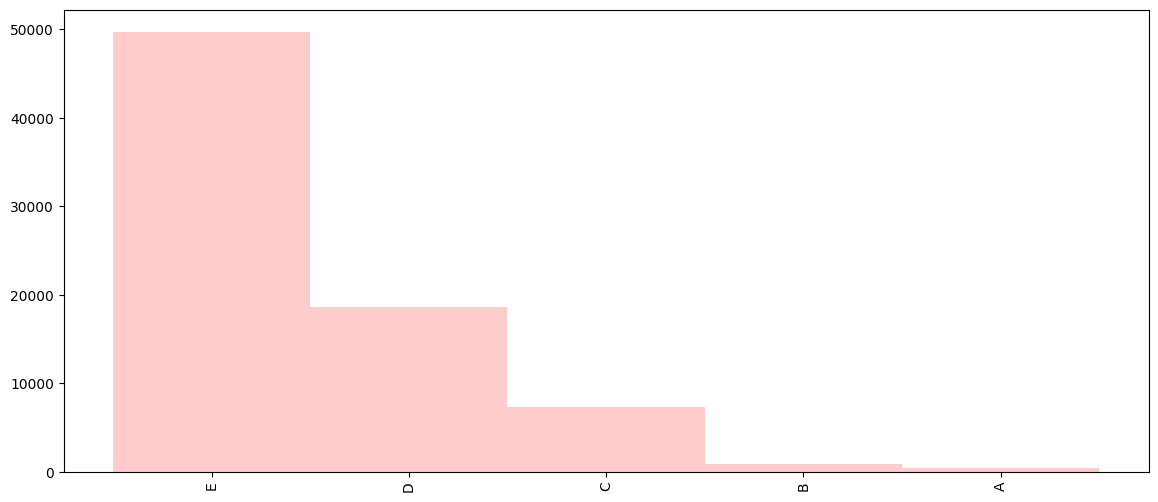

In [15]:
dist_frequencias_personalizada['Frequência'].plot.bar(
    width = 1,
    color = 'red',
    alpha = 0.2,
    figsize=(14,6)
)


<Axes: ylabel='Porcentagem(%)'>

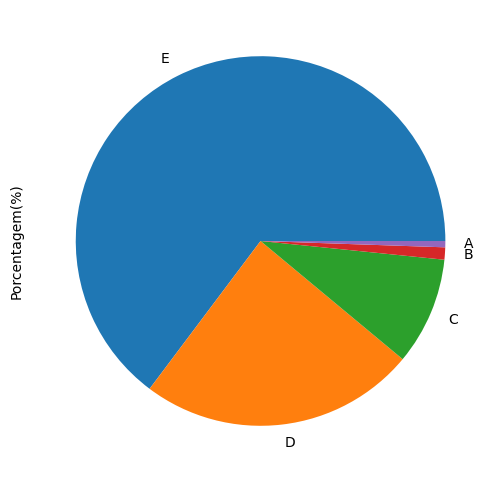

In [16]:
dist_frequencias_personalizada['Porcentagem(%)'].plot.pie(
    figsize=(14,6)
)

array([<Axes: ylabel='Frequência'>, <Axes: ylabel='Porcentagem(%)'>],
      dtype=object)

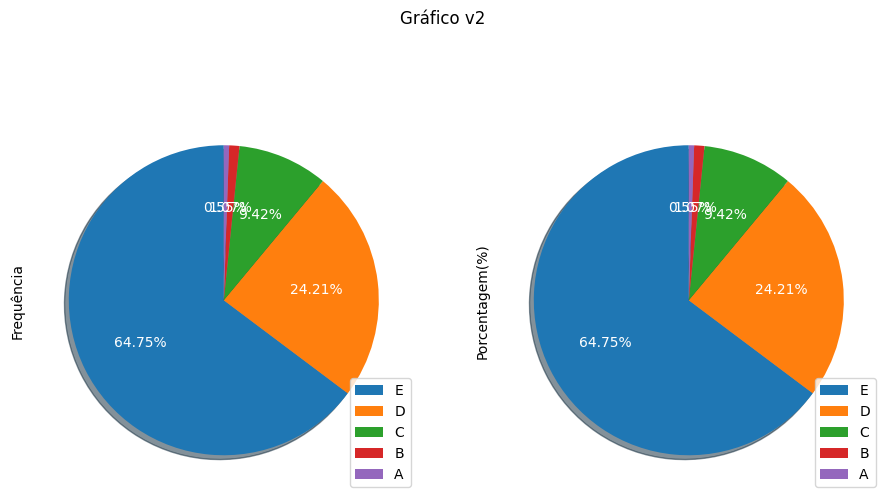

In [17]:
dist_frequencias_personalizada.plot.pie(
    subplots=True,
    shadow=True,
    startangle=90,
    autopct='%1.2f%%',
    textprops=dict(color="w"),
    title="Gráfico v2",
    figsize=(11, 6))

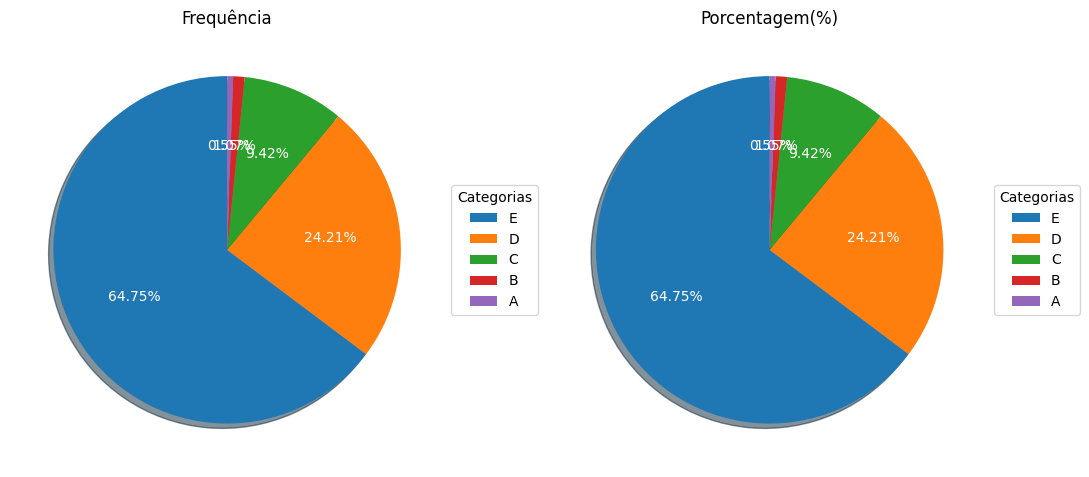

In [18]:
import matplotlib.pyplot as plt
plt.subplot(1, 2, 1)
dist_frequencias_personalizada['Frequência'].plot.pie(
    shadow=True,
    startangle=90,
    autopct='%1.2f%%',
    textprops=dict(color="w"),
    figsize=(11, 6))

# Adicionando legenda ao gráfico 1
plt.legend(dist_frequencias_personalizada['Frequência'].index, title='Categorias', loc='center left', bbox_to_anchor=(1, 0.5))

plt.title('Frequência')
plt.ylabel('')  # Remova o rótulo do eixo y para evitar redundância em gráficos de pizza

plt.subplot(1, 2, 2)
dist_frequencias_personalizada['Porcentagem(%)'].plot.pie(
    shadow=True,
    startangle=90,
    autopct='%1.2f%%',
    textprops=dict(color="w"),
    figsize=(11, 6))

# Adicionando legenda ao gráfico 1
plt.legend(dist_frequencias_personalizada['Porcentagem(%)'].index, title='Categorias', loc='center left', bbox_to_anchor=(1, 0.5))

plt.title('Porcentagem(%)')
plt.ylabel('')  # Remova o rótulo do eixo y para evitar redundância em gráficos de pizza

# Ajuste de layout para evitar sobreposição
plt.tight_layout()
plt.show()

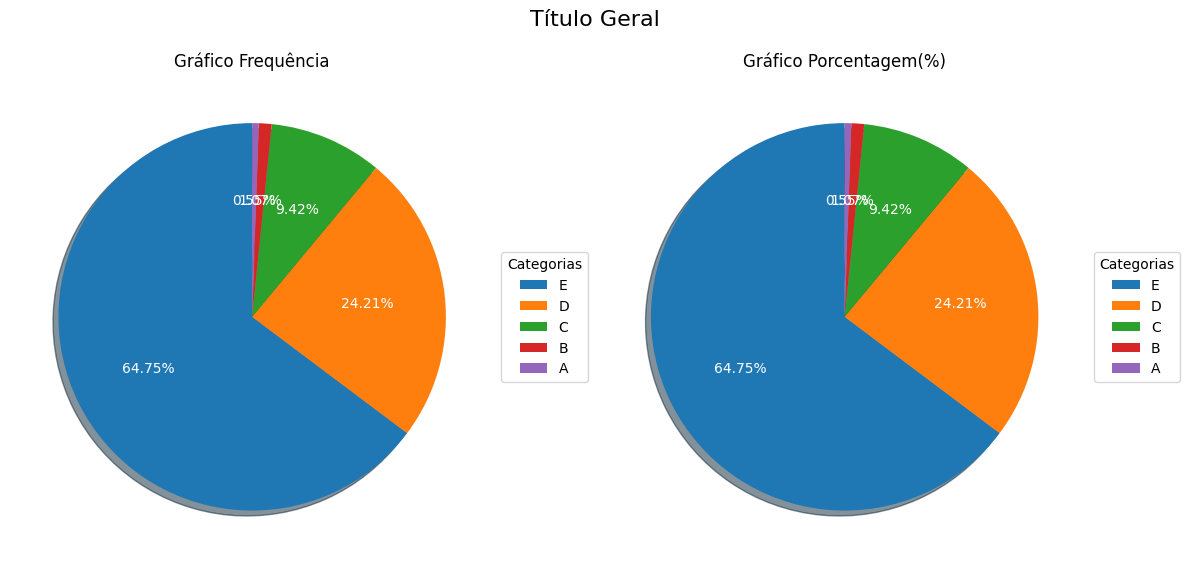

In [19]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

axs[0].pie(dist_frequencias_personalizada['Frequência'], shadow=True, startangle=90, autopct='%1.2f%%', textprops=dict(color="w"))
axs[0].set_title("Gráfico Frequência")
axs[0].set_ylabel('')
axs[0].legend(dist_frequencias_personalizada.index, title='Categorias', loc='center left', bbox_to_anchor=(1, 0.5))

axs[1].pie(dist_frequencias_personalizada['Porcentagem(%)'], shadow=True, startangle=90, autopct='%1.2f%%', textprops=dict(color="w"))
axs[1].set_title("Gráfico Porcentagem(%)")
axs[1].set_ylabel('')
axs[1].legend(dist_frequencias_personalizada.index, title='Categorias', loc='center left', bbox_to_anchor=(1, 0.5))

# Adicionando um título geral para a figura
fig.suptitle('Título Geral', fontsize=16)

# Ajuste de layout para evitar sobreposição
plt.tight_layout()
plt.show()

>
# **Análise Descritiva**
## **Conclusões**

Utilizamos a variável de Renda. Esta é uma variável quantitativa, mas foi transformada em uma variável qualitativa. O gráfico de barras e a tabela fornecem informações sobre a frequência e a porcentagem de ocorrência de diferentes categorias de Renda (A, B, C, D, E). Aqui estão algumas conclusões que podem ser extraídas:

#### **Distribuição de Frequência**:

* A maioria das ocorrências está na categoria 'E', com 49.755, representando 64,75% do total.
* As categorias 'C' e 'D' também têm ocorrências significativas, com 7.241 (9,42%) e 18.602 (24,21%), respectivamente.
* As categorias 'A' e 'B' têm ocorrências relativamente baixas em comparação com as outras.

#### **Ponderação da Distribuição**:

* As categorias 'D' e 'E' combinadas representam a grande maioria das ocorrências, com 89,96% do total.
* Isso sugere que as categorias 'D' e 'E' têm um peso considerável na distribuição geral.

#### **Desbalanceamento**:

* A distribuição não é uniforme, indicando um possível desbalanceamento nas ocorrências entre as diferentes categorias.
* Isso pode ter implicações significativas dependendo do contexto da análise.

#### **Importância Relativa**:

* Considerando a porcentagem, as categorias 'D' e 'E' são as mais importantes na amostra, enquanto 'A' e 'B' têm uma contribuição relativamente menor.

#### **Análise de Tendências**:

* A tabela sugere uma tendência crescente na frequência de ocorrências das categorias 'A', 'B', 'C', 'D' e 'E', com 'E' sendo a mais frequente.

#### **Possíveis Aplicações**:

* Dependendo do contexto, essa tabela pode ser usada para identificar áreas de foco, priorizar recursos ou entender a distribuição de algum fenômeno categorizado.







### Crie um histograma para as variáveis QUANTITATIVAS de nosso dataset
#### <font color='blue'>Descreva os pontos mais relevantes que você observa nos gráficos (assimetrias e seus tipos, possíveis causas para determinados comportamentos etc.)</font>

<Axes: title={'center': 'Histograma da Idade'}, xlabel='Anos', ylabel='Quantidade'>

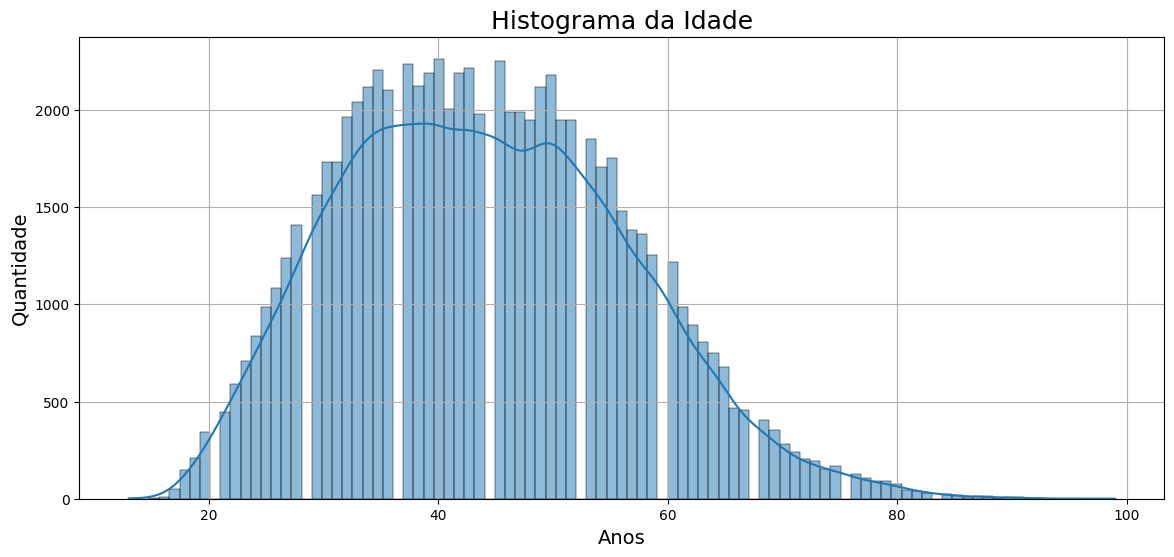

In [20]:
ax = sns.histplot(dados.Idade, kde=True,)
ax.figure.set_size_inches(14, 6)
ax.set_title('Histograma da Idade', fontsize=18)
ax.set_xlabel('Anos', fontsize=14)
ax.set_ylabel('Quantidade', fontsize=14)
sns.set_style("whitegrid")
ax.grid(True)
ax

In [21]:
dados.Idade

0        23
1        23
2        35
3        46
4        47
         ..
76835    46
76836    30
76837    32
76838    57
76839    38
Name: Idade, Length: 76840, dtype: int64

<Axes: title={'center': 'Histograma da Altura'}, xlabel='Metros', ylabel='Quantidade'>

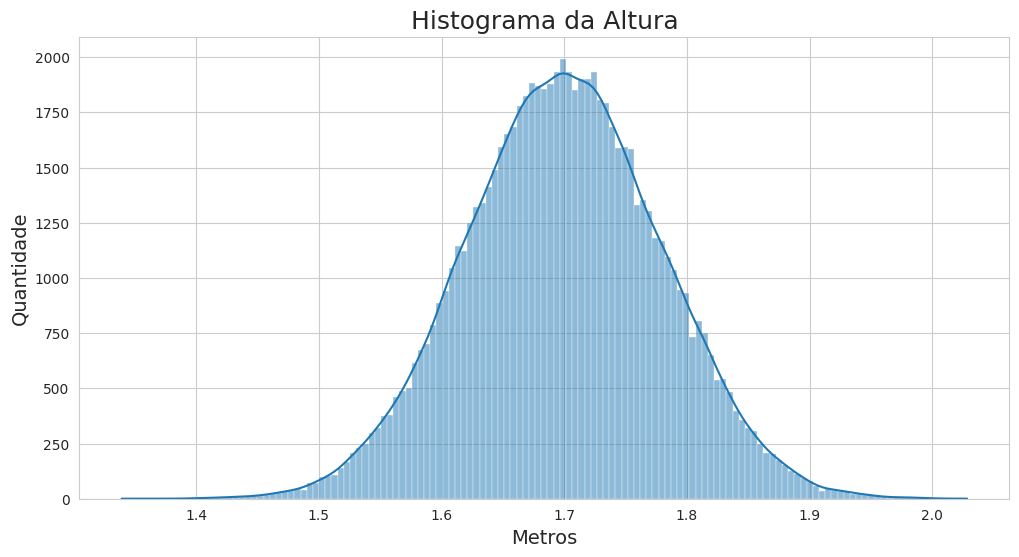

In [22]:
ax = sns.histplot(dados.Altura, kde=True)
# kde = False retira uma PDF que ele passa junto com o hist
ax.figure.set_size_inches(12, 6) # Altura. Largura
ax.set_title('Histograma da Altura', fontsize=18)
ax.set_xlabel('Metros', fontsize=14)
ax.set_ylabel('Quantidade', fontsize=14)
sns.set_style("whitegrid")
ax.grid(True)
ax

<ipython-input-23-98237e2d516f>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(dados.Renda, kde=True)


<Axes: title={'center': 'Histograma da Renda'}, xlabel='R$', ylabel='Quantidade'>

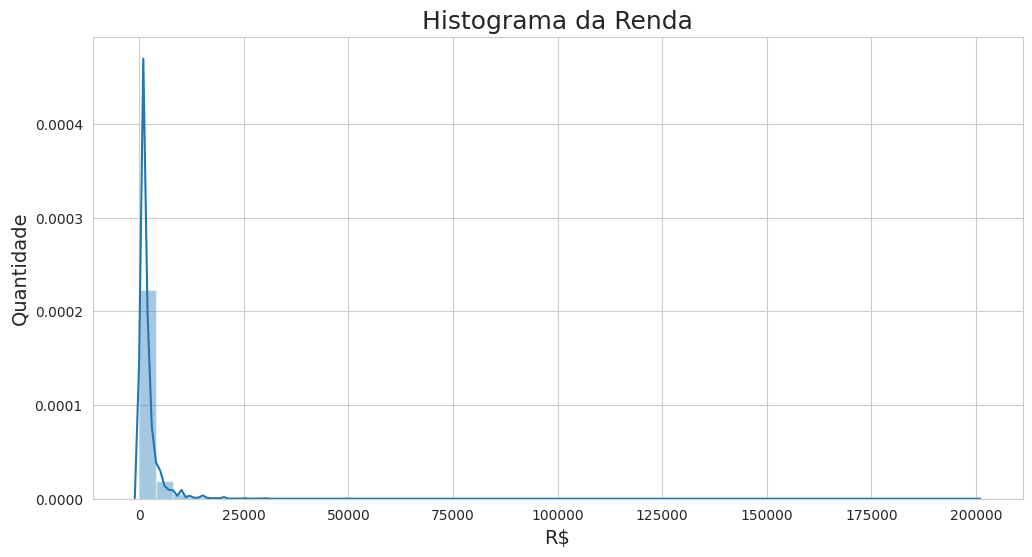

In [23]:
ax = sns.distplot(dados.Renda, kde=True)
# kde = False retira uma PDF que ele passa junto com o hist
ax.figure.set_size_inches(12, 6) # Altura. Largura
ax.set_title('Histograma da Renda', fontsize=18)
ax.set_xlabel('R$', fontsize=14)
ax.set_ylabel('Quantidade', fontsize=14)
sns.set_style("whitegrid")
ax.grid(True)
ax

# Conclusões

O histograma da distribuição de renda gerado mostra a frequência ou a porcentagem de observações em diferentes faixas de renda. Vamos analisar algumas conclusões que podem ser retiradas do histograma:

**Distribuição da Renda**: A forma do histograma pode fornecer insights sobre a distribuição da renda na amostra. Por exemplo, se o histograma for assimétrico para a direita, pode indicar uma concentração de renda em valores mais baixos. Se for assimétrico para a esquerda, pode indicar uma concentração de renda em valores mais altos.

**Concentração de Renda**: Observando as barras do histograma, você pode identificar se há uma concentração significativa de renda em uma ou mais faixas específicas. Por exemplo, se a maioria das observações estiver em uma faixa estreita de renda, isso indica uma concentração.

**Outliers**: Barras muito altas ou valores extremamente altos podem indicar a presença de outliers ou valores atípicos na distribuição de renda. Esses valores atípicos podem ter um impacto significativo nas análises.

**Disparidade de Renda**: Se houver uma grande diferença entre as contagens ou porcentagens nas faixas de renda, isso sugere uma disparidade de renda. Por exemplo, se a maioria das observações estiver em faixas de renda mais baixas, enquanto uma pequena porcentagem estiver em faixas de renda mais altas, isso indica uma disparidade.

**Tendência Geral**: Se houver uma tendência geral no aumento ou na diminuição das frequências ou porcentagens com o aumento da renda, isso também é informativo. Pode indicar, por exemplo, se a renda está distribuída de maneira uniforme ou se existem grupos específicos com rendas mais altas ou mais baixas.



### Para a variável RENDA, construa um histograma somente com as informações das pessoas com rendimento até R$ 20.000,00

In [24]:
vlr = dados.query('Renda == 5000')['Renda'].value_counts().values[0]
vlr

1533

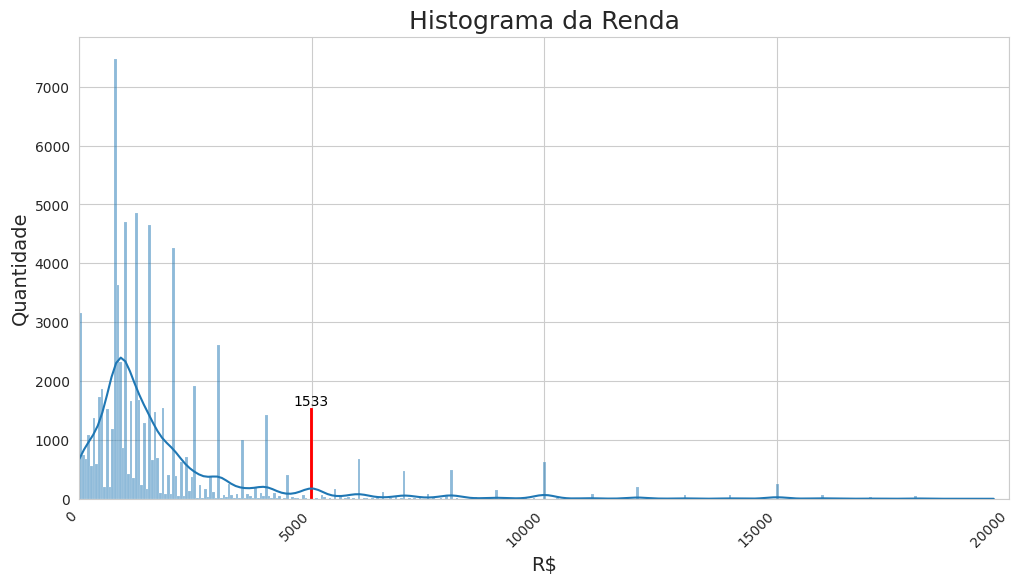

In [25]:
ax = sns.histplot(dados.query('Renda < 20000')['Renda'], kde=True)
# kde = False retira uma PDF que ele passa junto com o hist
ax.figure.set_size_inches(12, 6) # Altura. Largura
ax.set_title('Histograma da Renda', fontsize=18)
ax.set_xlabel('R$', fontsize=14)
ax.set_xlim(0, 20000)
ax.set_xticks(np.arange(0, 20000 + 1, 5000))
ax.set_xticklabels(ax.get_xticks(), rotation=45, ha='right')
ax.set_ylabel('Quantidade', fontsize=14)
sns.set_style("whitegrid")
ax.grid(True)
#ax

# Destacando a barra do ponto 1000 em vermelho
barra_destacada = 5000
for retangulo in ax.patches:
    if retangulo.get_x() < barra_destacada <= retangulo.get_x() + retangulo.get_width():
        retangulo.set_facecolor('red')

        # Adicionando a legenda à barra específica
        ax.text(retangulo.get_x() + retangulo.get_width() / 2, retangulo.get_height() + 1,
                f'{vlr}', ha='center', va='bottom', color='black')
plt.show()

In [26]:
dados.query('Renda == 5000')['Renda'].value_counts()

5000    1533
Name: Renda, dtype: int64

In [27]:
type(vlr)

numpy.int64

In [28]:
vlr = dados.query('Renda == 5000')['Renda'].value_counts()
type(vlr)

pandas.core.series.Series

### Construa uma tabela de frequências e uma com os percentuais do cruzando das variáveis SEXO e COR
#### <font color='blue'>Avalie o resultado da tabela e escreva suas principais conclusões</font>
#### <font color='red'>Utilize os dicionários abaixo para renomear as linha e colunas das tabelas de frequências e dos gráficos em nosso projeto</font>

In [29]:
sexo = {
    0: 'Masculino',
    1: 'Feminino'
}
cor = {
    0: 'Indígena',
    2: 'Branca',
    4: 'Preta',
    6: 'Amarela',
    8: 'Parda',
    9: 'Sem declaração'
}
anos_de_estudo = {
    1: 'Sem instrução e menos de 1 ano',
    2: '1 ano',
    3: '2 anos',
    4: '3 anos',
    5: '4 anos',
    6: '5 anos',
    7: '6 anos',
    8: '7 anos',
    9: '8 anos',
    10: '9 anos',
    11: '10 anos',
    12: '11 anos',
    13: '12 anos',
    14: '13 anos',
    15: '14 anos',
    16: '15 anos ou mais',
    17: 'Não determinados'
}
uf = {
    11: 'Rondônia',
    12: 'Acre',
    13: 'Amazonas',
    14: 'Roraima',
    15: 'Pará',
    16: 'Amapá',
    17: 'Tocantins',
    21: 'Maranhão',
    22: 'Piauí',
    23: 'Ceará',
    24: 'Rio Grande do Norte',
    25: 'Paraíba',
    26: 'Pernambuco',
    27: 'Alagoas',
    28: 'Sergipe',
    29: 'Bahia',
    31: 'Minas Gerais',
    32: 'Espírito Santo',
    33: 'Rio de Janeiro',
    35: 'São Paulo',
    41: 'Paraná',
    42: 'Santa Catarina',
    43: 'Rio Grande do Sul',
    50: 'Mato Grosso do Sul',
    51: 'Mato Grosso',
    52: 'Goiás',
    53: 'Distrito Federal'
}

In [30]:
frequencia = pd.crosstab(dados.Sexo, dados.Cor)
frequencia.rename(index = sexo, inplace=True)
frequencia.rename(columns = cor, inplace=True)
frequencia

Cor,Indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,256,22194,5502,235,25063
Feminino,101,9621,2889,117,10862


In [31]:
percentual = pd.crosstab(dados.Sexo,
                         dados.Cor,
                         normalize=True) *100
percentual.rename(index = sexo, inplace=True)
percentual.rename(columns = cor, inplace=True)
percentual

Cor,Indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,0.333160,28.883394,7.160333,0.305830,32.617126
Feminino,0.131442,12.520822,3.759761,0.152264,14.135867


In [32]:
freq = dados.Sexo.value_counts()
freq

0    53250
1    23590
Name: Sexo, dtype: int64

In [33]:
perc = dados.Sexo.value_counts(normalize=True)*100
perc

0    69.299844
1    30.700156
Name: Sexo, dtype: float64

In [34]:
dist_quali = pd.DataFrame({'Frequencia': freq, 'Porcentagem (%)': perc})
dist_quali

,Frequencia,Porcentagem (%)
0,53250,69.299844
1,23590,30.700156


In [35]:
dist_quali.rename(index = {0: 'M', 1:'F'})

,Frequencia,Porcentagem (%)
M,53250,69.299844
F,23590,30.700156


In [36]:
dist_quali.rename(index = {0: 'Masculino', 1:'Feminino'}, inplace=True)
dist_quali

,Frequencia,Porcentagem (%)
Masculino,53250,69.299844
Feminino,23590,30.700156


In [37]:
f = dados.Cor.value_counts()
f

8    35925
2    31815
4     8391
0      357
6      352
Name: Cor, dtype: int64

In [38]:
p = dados.Cor.value_counts(normalize=True)*100
p

8    46.752993
2    41.404217
4    10.920094
0     0.464602
6     0.458095
Name: Cor, dtype: float64

In [39]:
dist_ = pd.DataFrame({'Frequencia': f, 'Porcentagem (%)': p})
dist_

,Frequencia,Porcentagem (%)
8,35925,46.752993
2,31815,41.404217
4,8391,10.920094
0,357,0.464602
6,352,0.458095


In [40]:
dist_.rename(index=cor)

,Frequencia,Porcentagem (%)
Parda,35925,46.752993
Branca,31815,41.404217
Preta,8391,10.920094
Indígena,357,0.464602
Amarela,352,0.458095


In [41]:
dist_.rename(index = cor, inplace=True)
dist_

,Frequencia,Porcentagem (%)
Parda,35925,46.752993
Branca,31815,41.404217
Preta,8391,10.920094
Indígena,357,0.464602
Amarela,352,0.458095


A tabela que você forneceu parece apresentar percentuais de distribuição racial por gênero. Vamos realizar uma análise exploratória considerando esses dados:

**Distribuição Racial por Gênero:**

* **Masculino**: A maioria da população masculina é classificada como branca (28.88%) ou parda (32.62%), enquanto as categorias de indígena, preta e amarela têm porcentagens menores.
* **Feminino**: Similarmente, a maioria da população feminina é classificada como branca (12.52%) ou parda (14.14%). As categorias de indígena, preta e amarela têm porcentagens menores.

**Disparidades entre Gêneros:**

* A distribuição racial entre os gêneros pode apresentar disparidades significativas. Por exemplo, as porcentagens para as categorias branca e parda são geralmente mais altas para o gênero masculino em comparação com o feminino.

**Proporções Relativas:**

* Os percentuais são relativos à população total de cada gênero. Isso significa que, por exemplo, 28.88% dos homens são classificados como brancos, enquanto 12.52% das mulheres são classificadas da mesma forma.

**Diversidade Racial:**

* A presença de diversas categorias raciais reflete uma diversidade na população, e essa diversidade é representada em ambos os gêneros.

**Baixas Percentagens em Algumas Categorias:**

* Em algumas categorias, como "Indígena", as porcentagens são relativamente baixas em ambos os gêneros. Isso pode indicar uma representação menor dessa categoria na amostra.

## Realize, para a variável RENDA, uma análise descritiva com as ferramentas que aprendemos em nosso treinamento

### Obtenha a média aritimética

In [42]:
dados.Renda.mean()

2000.3831988547631

### Obtenha a mediana

In [43]:
dados.Renda.median()

1200.0

### Obtenha a moda

In [44]:
dados.Renda.mode()[0]

788

### Obtenha o desvio médio absoluto

In [45]:
dados.Renda.mad()

<ipython-input-45-9b3374082fa9>:1: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  dados.Renda.mad()


1526.4951371638058

### Obtenha a variância

In [46]:
dados.Renda.var()

11044906.006217021

### Obtenha o desvio-padrão

In [47]:
dados.Renda.std()

3323.3877303464037

### Obtenha a média, mediana e valor máximo da variável RENDA segundo SEXO e COR
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>O parâmento <i>aggfunc</i> da função <i>crosstab()</i> pode receber uma lista de funções. Exemplo: <i>aggfunc = {'mean', 'median', 'max'}</i></font>

In [48]:
renda_estatistica_por_sexo_e_cor = pd.crosstab(
    dados.Cor,
    dados.Sexo,
    values = dados.Renda,
    aggfunc = [len, np.mean, np.median, np.std, np.max, np.min, lambda x: x.mode().iloc[0]])
renda_estatistica_por_sexo_e_cor.rename(index = cor, inplace = True)
renda_estatistica_por_sexo_e_cor.rename(columns = sexo, inplace = True)
renda_estatistica_por_sexo_e_cor

len                  mean                 median           \
Sexo     Masculino Feminino    Masculino     Feminino Masculino Feminino   
Cor                                                                        
Indígena       256      101  1081.710938  2464.386139     797.5    788.0   
Branca       22194     9621  2925.744435  2109.866750    1700.0   1200.0   
Preta         5502     2889  1603.861687  1134.596400    1200.0    800.0   
Amarela        235      117  4758.251064  3027.341880    2800.0   1500.0   
Parda        25063    10862  1659.577425  1176.758516    1200.0    800.0   

                  std                    amax               amin           \
Sexo        Masculino      Feminino Masculino Feminino Masculino Feminino   
Cor                                                                         
Indígena  1204.093490  11957.498292     10000   120000         0        0   
Branca    4750.791872   3251.013154    200000   100000         0        0   
Preta     1936.309271   1349.799809     50000    23000         0        0   
Amarela   5740.824820   3731.173660     50000    20000         0        0   
Parda     2312.087184   1596.233048    100000    30000         0        0   

          <lambda>           
Sexo     Masculino Feminino  
Cor                          
Indígena         0      788  
Branca        2000      788  
Preta          788      788  
Amarela       4000     1000  
Parda          788      788

In [49]:
renda_estatistica_por_sexo_e_cor = pd.crosstab(
    dados.Cor,
    dados.Sexo,
    values = dados.Renda,
    aggfunc = [len, np.mean, np.median, np.max, np.min])
renda_estatistica_por_sexo_e_cor.rename(index = cor, inplace = True)
renda_estatistica_por_sexo_e_cor.rename(columns = sexo, inplace = True)
renda_estatistica_por_sexo_e_cor

len                  mean                 median           \
Sexo     Masculino Feminino    Masculino     Feminino Masculino Feminino   
Cor                                                                        
Indígena       256      101  1081.710938  2464.386139     797.5    788.0   
Branca       22194     9621  2925.744435  2109.866750    1700.0   1200.0   
Preta         5502     2889  1603.861687  1134.596400    1200.0    800.0   
Amarela        235      117  4758.251064  3027.341880    2800.0   1500.0   
Parda        25063    10862  1659.577425  1176.758516    1200.0    800.0   

              amax               amin           
Sexo     Masculino Feminino Masculino Feminino  
Cor                                             
Indígena     10000   120000         0        0  
Branca      200000   100000         0        0  
Preta        50000    23000         0        0  
Amarela      50000    20000         0        0  
Parda       100000    30000         0        0

> ### Conclusões


A tabela fornecida apresenta estatísticas resumidas da renda, desagregadas por cor e sexo. Vamos analisar algumas conclusões que podem ser retiradas desta tabela:

1. **Tendências Gerais**: A tabela fornece informações sobre a quantidade de dados (len), a média (mean), a mediana (median), o desvio padrão (std), o valor máximo (amax), o valor mínimo (amin) e a moda para cada combinação de cor e sexo.

2. **Disparidades de Renda entre Cores e Sexos:** Comparando as médias e medianas de renda, é possível observar disparidades significativas entre diferentes grupos. Por exemplo, pode-se observar que a média de renda para homens brancos é maior do que a média de renda para homens pretos.

3. **Variabilidade da Renda:** O desvio padrão (std) fornece uma medida da variabilidade da renda dentro de cada grupo. Valores mais altos indicam maior dispersão dos dados em torno da média.

4. **Renda Máxima e Mínima:** Os valores máximos (amax) e mínimos (amin) indicam os extremos da distribuição de renda para cada grupo. Isso destaca a amplitude da distribuição de renda dentro de cada categoria.

5. **Moda:** A moda indica o valor mais frequente na distribuição de renda para cada grupo. Isso pode ser útil para entender os valores mais comuns.

6. **Estratificação por Cor e Sexo:** A tabela está estratificada por cor e sexo, permitindo uma análise mais detalhada das disparidades de renda em subgrupos específicos.

7. **Quantidade de Dados por Grupo:** A coluna "len" fornece a quantidade de dados em cada grupo, o que é importante para avaliar a representatividade estatística.

8. **Observações sobre Grupos Específicos:** Por exemplo, para a categoria "Amarela", nota-se uma média de renda mais alta para os homens em comparação com as mulheres, mas a amostra é relativamente pequena.

### Obtenha as medidas de dispersão da variável RENDA segundo SEXO e COR
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>O parâmento <i>aggfunc</i> da função <i>crosstab()</i> pode receber uma lista de funções. Exemplo: <i>aggfunc = {'mad', 'var', 'std'}</i></font>

In [50]:
renda_estatistica_por_sexo_e_cor = pd.crosstab(
    dados.Cor,
    dados.Sexo,
    values = dados.Renda,
    aggfunc = {'mad', 'var', 'std'})
renda_estatistica_por_sexo_e_cor.rename(index = cor, inplace = True)
renda_estatistica_por_sexo_e_cor.rename(columns = sexo, inplace = True)
renda_estatistica_por_sexo_e_cor

<ipython-input-50-19da7179f0e8>:1: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  renda_estatistica_por_sexo_e_cor = pd.crosstab(
<ipython-input-50-19da7179f0e8>:1: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  renda_estatistica_por_sexo_e_cor = pd.crosstab(
<ipython-input-50-19da7179f0e8>:1: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  renda_estatistica_por_sexo_e_cor = pd.crosstab(
<ipython-input-50-19da7179f0e8>:1: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  renda_estatistica_por_sexo_e_cor = pd.crosstab(
<ipython-input-50-19da71

mad                       std                         var  \
Sexo        Masculino     Feminino    Masculino      Feminino     Masculino   
Cor                                                                           
Indígena   798.910889  3007.892952  1204.093490  11957.498292  1.449841e+06   
Branca    2261.012346  1670.967106  4750.791872   3251.013154  2.257002e+07   
Preta      975.602482   705.453357  1936.309271   1349.799809  3.749294e+06   
Amarela   3709.597211  2549.146322  5740.824820   3731.173660  3.295707e+07   
Parda     1125.827704   811.580946  2312.087184   1596.233048  5.345747e+06   

                        
Sexo          Feminino  
Cor                     
Indígena  1.429818e+08  
Branca    1.056909e+07  
Preta     1.821960e+06  
Amarela   1.392166e+07  
Parda     2.547960e+06

> ### Conclusões

Escreva suas conclusões aqui...

### Construa um box plot da variável RENDA segundo SEXO e COR
#### <font color='blue'>É possível verificar algum comportamento diferenciado no rendimento entre os grupos de pessoas analisados? Avalie o gráfico e destaque os pontos mais importantes.</font>
#### <font color='red'>1º - Utilize somente as informações de pessoas com renda abaixo de R$ 10.000</font>
#### <font color='red'>2º - Para incluir uma terceira variável na construção de um boxplot utilize o parâmetro <i>hue</i> e indique a variável que quer incluir na subdivisão.</font>
#### Mais informações: https://seaborn.pydata.org/generated/seaborn.boxplot.html

In [51]:
dados.Cor.value_counts()

8    35925
2    31815
4     8391
0      357
6      352
Name: Cor, dtype: int64

<Axes: title={'center': 'Box-plot da RENDA por SEXO e COR'}, xlabel='R$', ylabel='Cor'>

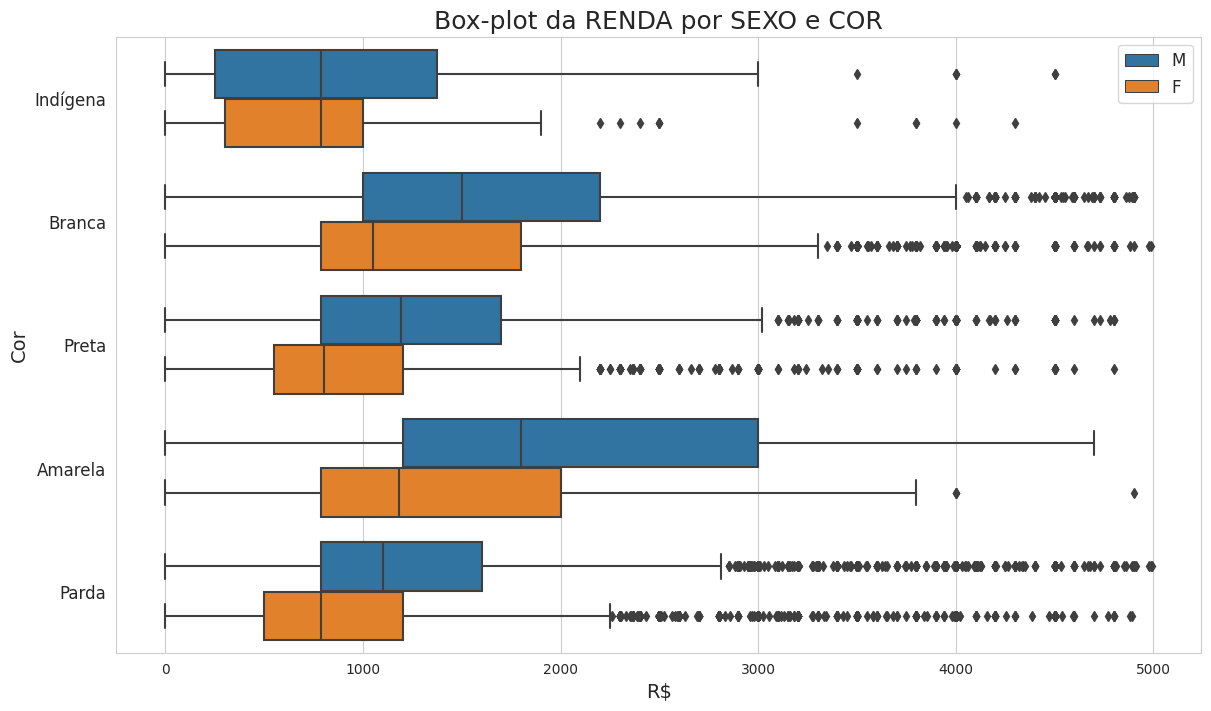

In [52]:
ax = sns.boxplot(x = 'Renda', y = 'Cor', hue = 'Sexo', data=dados.query('Renda < 5000'), orient='h')
ax.figure.set_size_inches(14, 8)    # Personalizando o tamanho da figura
ax.set_title('Box-plot da RENDA por SEXO e COR', fontsize=18)    # Configurando o título do gráfico
ax.set_xlabel('R$', fontsize=14)    # Configurando o label do eixo X
ax.set_ylabel('Cor', fontsize=14)    # Configurando o label do eixo Y

# Configurando o label de cada categoria do eixo Y
ax.set_yticklabels(['Indígena', 'Branca', 'Preta', 'Amarela', 'Parda'], fontsize=12)

# Configurações da legenda do gráfico (Sexo)
handles, _ = ax.get_legend_handles_labels()
ax.legend(handles, ['M', 'F'], fontsize=12)

ax

<Axes: title={'center': 'Box-plot da RENDA por SEXO e COR'}, xlabel='R$', ylabel='Cor'>

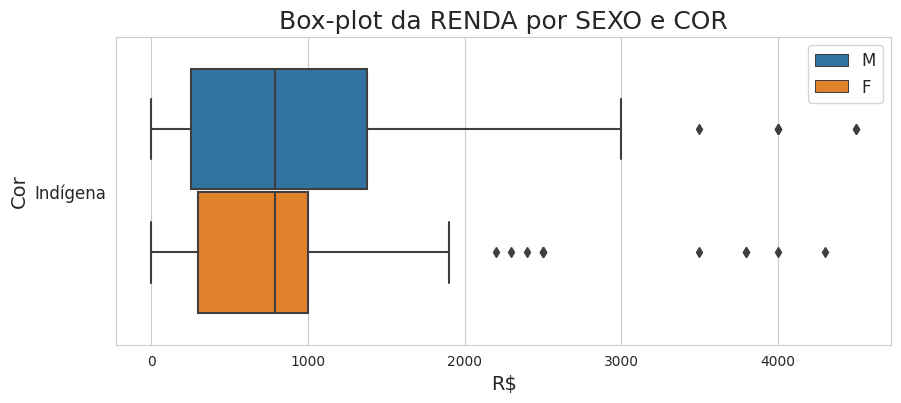

In [53]:
ax = sns.boxplot(x = 'Renda',
                 y = 'Cor',
                 hue = 'Sexo',
                 data = dados.query('Cor == 0 and Renda < 5000'),
                 orient='h')
ax.figure.set_size_inches(10, 4)    # Personalizando o tamanho da figura
ax.set_title('Box-plot da RENDA por SEXO e COR', fontsize=18)    # Configurando o título do gráfico
ax.set_xlabel('R$', fontsize=14)    # Configurando o label do eixo X
ax.set_ylabel('Cor', fontsize=14)    # Configurando o label do eixo Y

# Configurando o label de cada categoria do eixo Y
ax.set_yticklabels(['Indígena'], fontsize=12)

# Configurações da legenda do gráfico (Sexo)
handles, _ = ax.get_legend_handles_labels()
ax.legend(handles, ['M', 'F'], fontsize=12)

ax

<Axes: title={'center': 'Box-plot da RENDA por SEXO e COR'}, xlabel='R$', ylabel='Cor'>

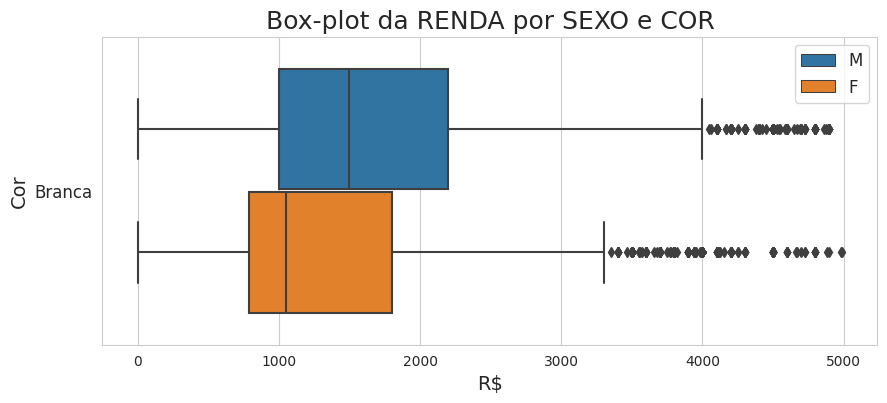

In [54]:
ax = sns.boxplot(x = 'Renda',
                 y = 'Cor',
                 hue = 'Sexo',
                 data = dados.query('Cor == 2 and Renda < 5000'),
                 orient='h')
ax.figure.set_size_inches(10, 4)    # Personalizando o tamanho da figura
ax.set_title('Box-plot da RENDA por SEXO e COR', fontsize=18)    # Configurando o título do gráfico
ax.set_xlabel('R$', fontsize=14)    # Configurando o label do eixo X
ax.set_ylabel('Cor', fontsize=14)    # Configurando o label do eixo Y

# Configurando o label de cada categoria do eixo Y
ax.set_yticklabels(['Branca'], fontsize=12)

# Configurações da legenda do gráfico (Sexo)
handles, _ = ax.get_legend_handles_labels()
ax.legend(handles, ['M', 'F'], fontsize=12)

ax

<Axes: title={'center': 'Box-plot da RENDA por SEXO e COR'}, xlabel='R$', ylabel='Cor'>

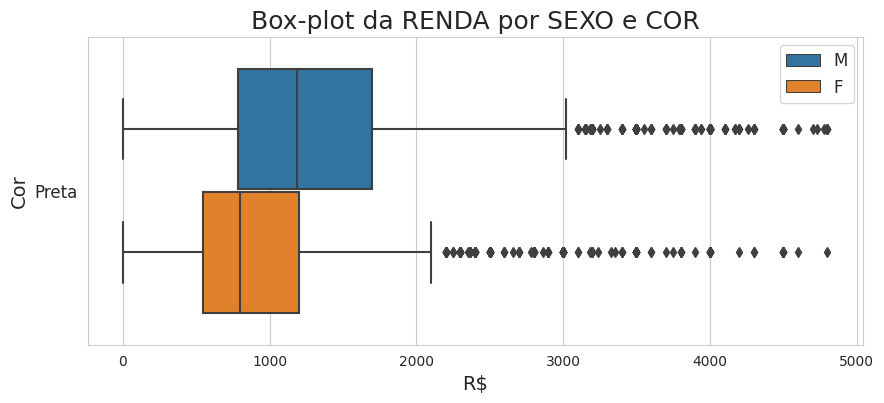

In [55]:
ax = sns.boxplot(x = 'Renda',
                 y = 'Cor',
                 hue = 'Sexo',
                 data = dados.query('Cor == 4 and Renda < 5000'),
                 orient='h')
ax.figure.set_size_inches(10, 4)    # Personalizando o tamanho da figura
ax.set_title('Box-plot da RENDA por SEXO e COR', fontsize=18)    # Configurando o título do gráfico
ax.set_xlabel('R$', fontsize=14)    # Configurando o label do eixo X
ax.set_ylabel('Cor', fontsize=14)    # Configurando o label do eixo Y

# Configurando o label de cada categoria do eixo Y
ax.set_yticklabels(['Preta'], fontsize=12)

# Configurações da legenda do gráfico (Sexo)
handles, _ = ax.get_legend_handles_labels()
ax.legend(handles, ['M', 'F'], fontsize=12)

ax

<Axes: title={'center': 'Histograma da Altura'}, xlabel='Metros', ylabel='Quantidade'>

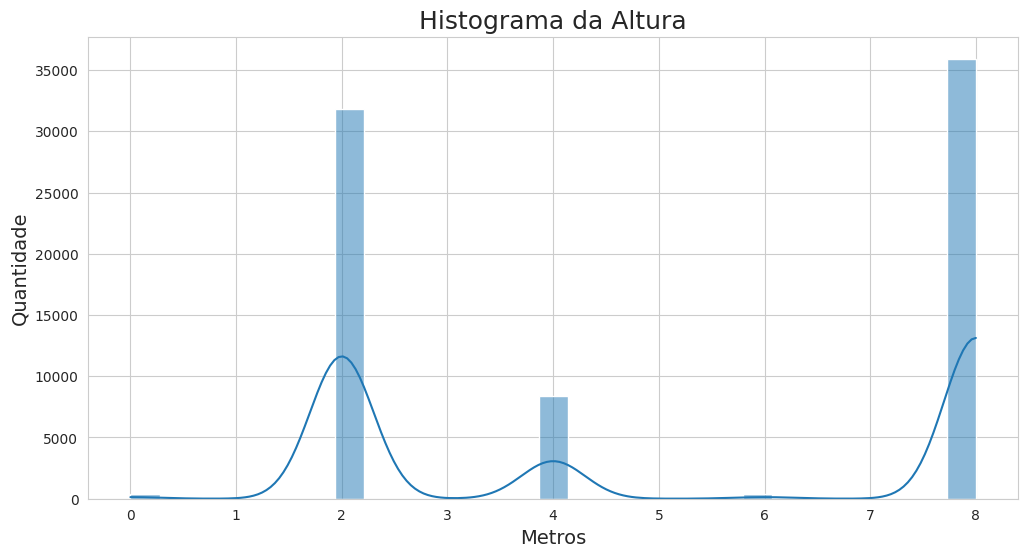

In [56]:
ax = sns.histplot(dados.Cor, kde=True)
# kde = False retira uma PDF que ele passa junto com o hist
ax.figure.set_size_inches(12, 6) # Altura. Largura
ax.set_title('Histograma da Altura', fontsize=18)
ax.set_xlabel('Metros', fontsize=14)
ax.set_ylabel('Quantidade', fontsize=14)
sns.set_style("whitegrid")
ax.grid(True)
ax

In [ ]:
ax = sns.histplot(data = d, kde=True)
# kde = False retira uma PDF que ele passa junto com o hist
ax.figure.set_size_inches(12, 6) # Altura. Largura
ax.set_title('Histograma da Cor', fontsize=18)
ax.set_xlabel('Reças', fontsize=14)
ax.set_ylabel('Quantidade', fontsize=14)
sns.set_style("whitegrid")
ax.grid(True)
ax

Exception ignored in: <function TransformNode.set_children.<locals>.<lambda> at 0x787ea61efe20>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/matplotlib/transforms.py", line 209, in <lambda>
    self, lambda _, pop=child._parents.pop, k=id(self): pop(k))
KeyboardInterrupt: 


KeyboardInterrupt: ignored

Error in callback <function _draw_all_if_interactive at 0x787ef9ee1d80> (for post_execute):


KeyboardInterrupt: ignored

> ### Conclusões

Escreva suas conclusões aqui...

<Axes: title={'center': 'Histograma da Altura'}, xlabel='Metros', ylabel='Quantidade'>

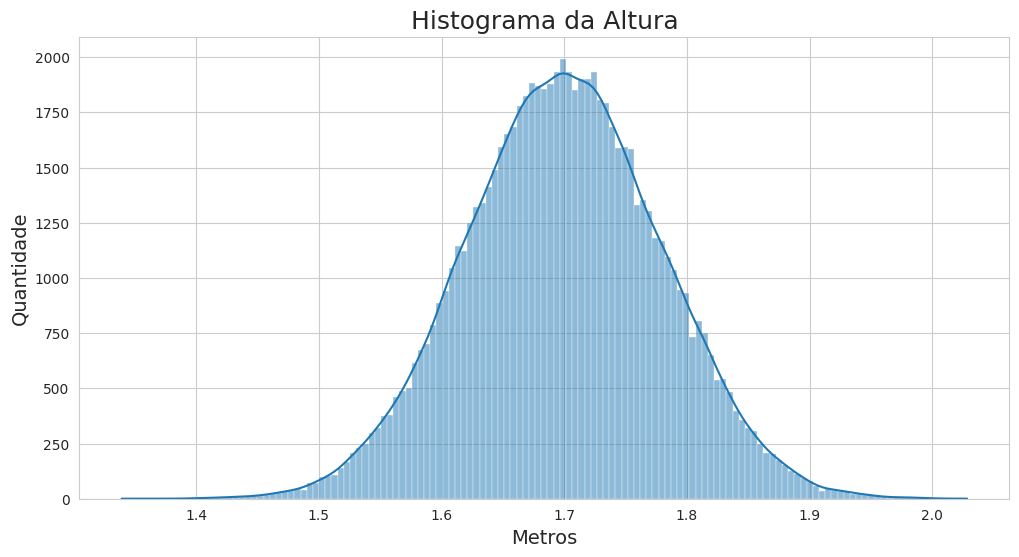

In [57]:
ax = sns.histplot(dados.Altura, kde=True)
# kde = False retira uma PDF que ele passa junto com o hist
ax.figure.set_size_inches(12, 6) # Altura. Largura
ax.set_title('Histograma da Altura', fontsize=18)
ax.set_xlabel('Metros', fontsize=14)
ax.set_ylabel('Quantidade', fontsize=14)
sns.set_style("whitegrid")
ax.grid(True)
ax

<Axes: title={'center': 'Altura'}, xlabel='Metros'>

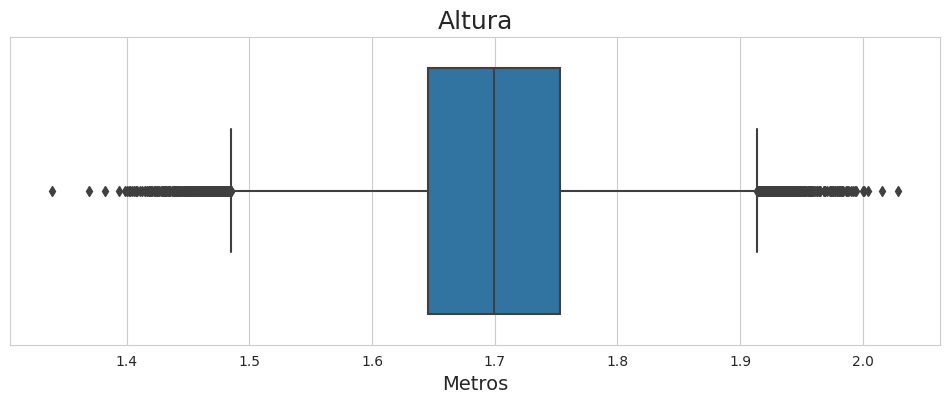

In [58]:
ax = sns.boxplot( x = 'Altura', data = dados, orient = 'h')
ax.figure.set_size_inches(12, 4)
ax.set_title('Altura', fontsize=18)
ax.set_xlabel('Metros', fontsize=14)
ax

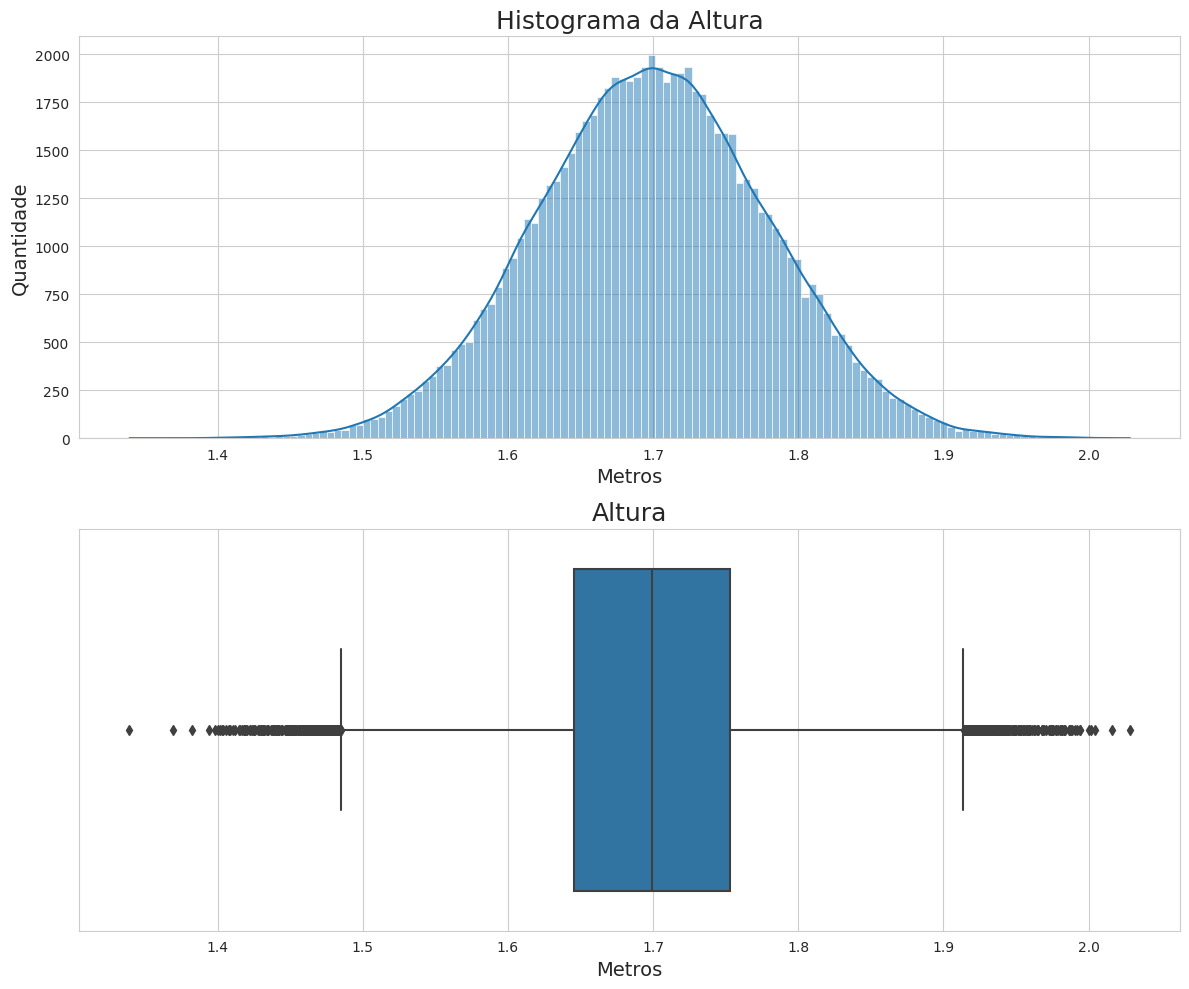

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configuração da grade de subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

# Primeiro subplot - Histograma
sns.histplot(dados.Altura, kde=True, ax=ax1)
ax1.set_title('Histograma da Altura', fontsize=18)
ax1.set_xlabel('Metros', fontsize=14)
ax1.set_ylabel('Quantidade', fontsize=14)
sns.set_style("whitegrid")
ax1.grid(True)

# Segundo subplot - Boxplot
sns.boxplot(x='Altura', data=dados, orient='h', ax=ax2)
ax2.set_title('Altura', fontsize=18)
ax2.set_xlabel('Metros', fontsize=14)

# Ajusta o layout para evitar sobreposições
plt.tight_layout()

# Exibe o gráfico
plt.show()


# <font color="red">DESAFIO<font>
### Qual percentual de pessoas de nosso <i>dataset</i> ganham um salário mínimo (R$ 788,00) ou menos?
#### <font color='red'>Utilize a função <i>percentileofscore()</i> do <i>scipy</i> para realizar estas análises.</font>
#### Mais informações: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.percentileofscore.html


In [75]:
from scipy import stats

percentual = stats.percentileofscore(dados.Renda, 788, kind='weak')
desvio_padrao = dados.Renda.std()
print("Percentil: {:.4f}%, Desvio Padrão: ±{:.2f}".format(percentual, desvio_padrao))


Percentil: 28.8678%, Desvio Padrão: ±3323.39


### Qual o valor máximo ganho por 99% das pessoas de nosso <i>dataset</i>?
#### <font color='red'>Utilize o método <i>quantile()</i> do <i>pandas</i> para realizar estas análises.</font>

In [77]:
valor = dados.Renda.quantile(.99)
print("R$ {:.2f}".format(valor))

R$ 15000.00


### Obtenha a média, mediana, valor máximo e desvio-padrão da variável RENDA segundo ANOS DE ESTUDO e SEXO
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>O parâmento <i>aggfunc</i> da função <i>crosstab()</i> pode receber uma lista de funções. Exemplo: <i>aggfunc = ['mean', 'median', 'max', 'std']</i></font>

In [78]:
renda_estatisticas_por_sexo_e_estudo = pd.crosstab(dados['Anos de Estudo'],
                                                   dados.Sexo,
                                                   aggfunc = {'mean', 'median', 'max', 'std'},
                                                   values = dados.Renda).round(2)
renda_estatisticas_por_sexo_e_estudo.rename(index = anos_de_estudo, inplace = True)
renda_estatisticas_por_sexo_e_estudo.rename(columns = sexo, inplace = True)
renda_estatisticas_por_sexo_e_estudo

max               mean           \
Sexo                           Masculino Feminino Masculino Feminino   
Anos de Estudo                                                         
Sem instrução e menos de 1 ano     30000    10000    799.49   516.20   
1 ano                              30000     2000    895.63   492.77   
2 anos                             40000     4000    931.18   529.91   
3 anos                             80000     3500   1109.20   546.85   
4 anos                             50000    10000   1302.33   704.28   
5 anos                             35000     8000   1338.65   781.39   
6 anos                             25000     6000   1448.88   833.73   
7 anos                             40000     9000   1465.50   830.75   
8 anos                             30000    18000   1639.40   933.62   
9 anos                             60000    20000   1508.04   868.02   
10 anos                            45000     6000   1731.27   925.92   
11 anos                           200000   100000   2117.06  1286.79   
12 anos                            30000   120000   2470.33  1682.31   
13 anos                            25000    20000   3195.10  1911.73   
14 anos                            50000    20000   3706.62  2226.46   
15 anos ou mais                   200000   100000   6134.28  3899.51   
Não determinados                    7000     3000   1295.76   798.17   

                                  median                std           
Sexo                           Masculino Feminino Masculino Feminino  
Anos de Estudo                                                        
Sem instrução e menos de 1 ano     700.0    390.0   1023.90   639.31  
1 ano                              788.0    400.0   1331.95   425.29  
2 anos                             788.0    450.0   1435.17   498.23  
3 anos                             800.0    500.0   2143.80   424.12  
4 anos                            1000.0    788.0   1419.82   629.55  
5 anos                            1045.0    788.0   1484.65   635.78  
6 anos                            1200.0    788.0   1476.63   574.55  
7 anos                            1200.0    788.0   1419.71   602.04  
8 anos                            1300.0    800.0   1515.58   896.78  
9 anos                            1200.0    788.0   2137.66   973.22  
10 anos                           1218.0    800.0   2078.61   620.61  
11 anos                           1500.0   1000.0   2676.54  1819.04  
12 anos                           1800.0   1200.0   2268.08  4851.83  
13 anos                           2400.0   1300.0   2797.12  2053.79  
14 anos                           2500.0   1600.0   3987.21  2064.08  
15 anos ou mais                   4000.0   2800.0   7447.61  4212.77  
Não determinados                  1200.0    788.0    979.65   459.99

### Construa um box plot da variável RENDA segundo ANOS DE ESTUDO e SEXO
#### <font color='blue'>É possível verificar algum comportamento diferenciado no rendimento entre os grupos de pessoas analisados? Avalie o gráfico e destaque os pontos mais importantes.</font>
#### <font color='red'>1º - Utilize somente as informações de pessoas com renda abaixo de R$ 10.000</font>
#### <font color='red'>2º - Utilize a variável IDADE para identificar se a desigualdade se verifica para pessoas de mesma idade. Exemplo: <i>data=dados.query('Renda < 10000 and Idade == 40')</i> ou <i>data=dados.query('Renda < 10000 and Idade == 50')</i></font>
#### <font color='red'>3º - Para incluir uma terceira variável na construção de um boxplot utilize o parâmetro <i>hue</i> e indique a variável que quer incluir na subdivisão.</font>
#### Mais informações: https://seaborn.pydata.org/generated/seaborn.boxplot.html

<Axes: title={'center': 'Box-plot da RENDA por SEXO e ANOS DE ESTUDO'}, xlabel='R$', ylabel='Anos de Estudo'>

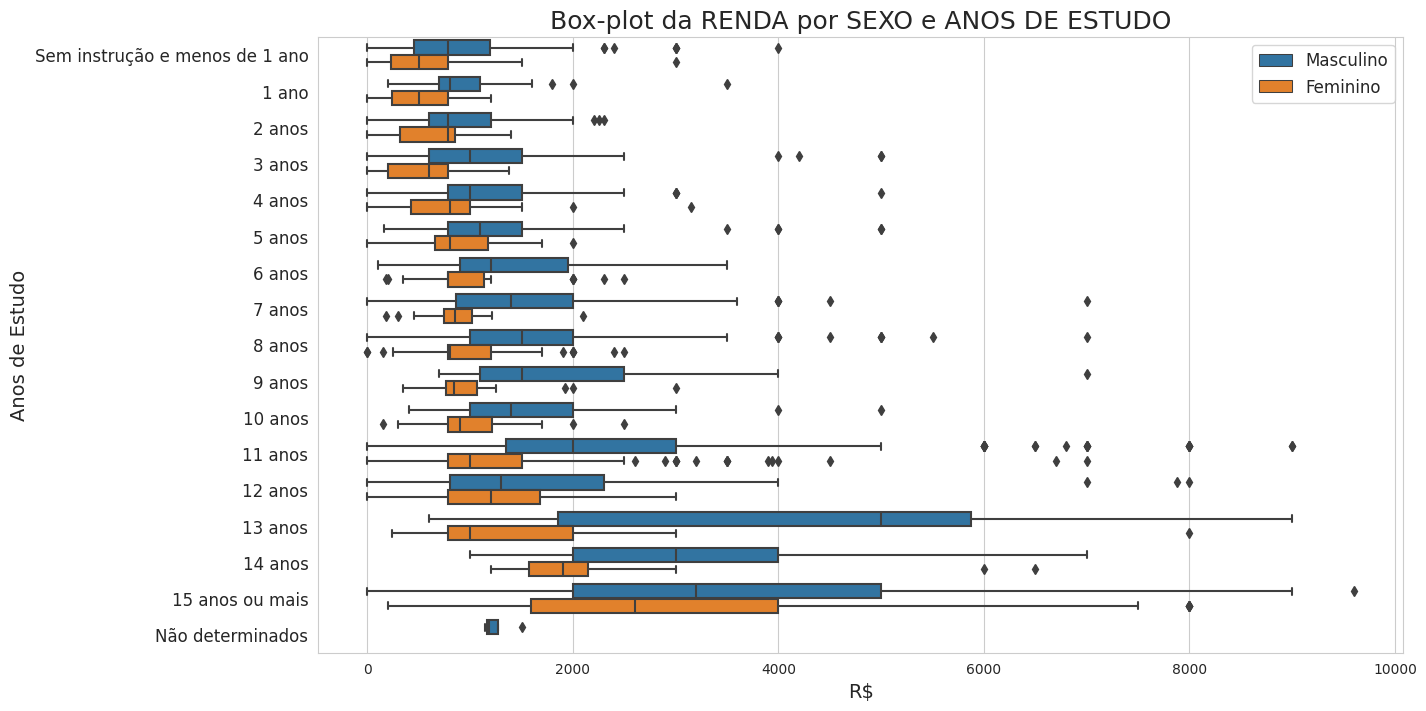

In [79]:
ax = sns.boxplot(x = 'Renda', y = 'Anos de Estudo', hue = 'Sexo', data=dados.query('Renda < 10000 and Idade == 50'), orient='h')

ax.figure.set_size_inches(14, 8)    # Personalizando o tamanho da figura

ax.set_title('Box-plot da RENDA por SEXO e ANOS DE ESTUDO', fontsize=18)    # Configurando o título do gráfico

ax.set_xlabel('R$', fontsize=14)    # Configurando o label do eixo X

ax.set_ylabel('Anos de Estudo', fontsize=14)    # Configurando o label do eixo Y
ax.set_yticklabels([key for key in anos_de_estudo.values()], fontsize=12)    # Configurando o label de cada categoria do eixo Y

# Configurações da legenda do gráfico (Sexo)
handles, _ = ax.get_legend_handles_labels()
ax.legend(handles, ['Masculino', 'Feminino'], fontsize=12)

ax

> ### Conclusões

Escreva suas conclusões aqui...

### Obtenha a média, mediana, valor máximo e desvio-padrão da variável RENDA segundo as UNIDADES DA FEDERAÇÃO
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>Utilize o método <i>groupby()</i> do <i>pandas</i> juntamente com o método <i>agg()</i> para contruir a tabulação. O método <i>agg()</i> pode receber um dicionário especificando qual coluna do DataFrame deve ser utilizada e qual lista de funções estatísticas queremos obter, por exemplo: <i>dados.groupby(['UF']).agg({'Renda': ['mean', 'median', 'max', 'std']})</i></font>

In [80]:
renda_estatisticas_por_uf = dados.groupby(['UF']).agg({'Renda': ['mean', 'median', 'max', 'std']})
renda_estatisticas_por_uf.rename(index = uf)

Renda                             
                            mean  median     max          std
UF                                                           
Rondônia             1789.761223  1200.0   50000  2406.161161
Acre                 1506.091782   900.0   30000  2276.233415
Amazonas             1445.130100   900.0   22000  1757.935591
Roraima              1783.588889  1000.0   20000  2079.659238
Pará                 1399.076871   850.0   50000  2053.779555
Amapá                1861.353516  1200.0   15580  2020.688632
Tocantins            1771.094946  1000.0   60000  2934.590741
Maranhão             1019.432009   700.0   30000  1887.816905
Piauí                1074.550784   750.0   40000  2373.355726
Ceará                1255.403692   789.0   25000  1821.963536
Rio Grande do Norte  1344.721480   800.0   15500  1651.805500
Paraíba              1293.370487   788.0   30000  1950.272431
Pernambuco           1527.079319   900.0   50000  2389.622497
Alagoas              1144.552602   788.0   11000  1237.856197
Sergipe              1109.111111   788.0   16000  1478.997878
Bahia                1429.645094   800.0  200000  3507.917248
Minas Gerais         2056.432084  1200.0  100000  3584.721547
Espírito Santo       2026.383852  1274.0  100000  3513.846868
Rio de Janeiro       2496.403168  1400.0  200000  5214.583518
São Paulo            2638.104986  1600.0   80000  3503.777366
Paraná               2493.870753  1500.0  200000  4302.937995
Santa Catarina       2470.854945  1800.0   80000  3137.651112
Rio Grande do Sul    2315.158336  1500.0   35000  2913.335783
Mato Grosso do Sul   2262.604167  1500.0   42000  3031.419122
Mato Grosso          2130.652778  1500.0   35000  2542.630178
Goiás                1994.580794  1500.0   30000  2221.933065
Distrito Federal     4241.954722  2000.0  100000  5550.463338

### Construa um box plot da variável RENDA segundo as UNIDADES DA FEDERAÇÃO
#### <font color='blue'>É possível verificar algum comportamento diferenciado no rendimento entre os grupos analisados? Avalie o gráfico e destaque os pontos mais importantes.</font>
#### <font color='red'>1º - Utilize somente as informações de pessoas com renda abaixo de R$ 10.000</font>

<Axes: title={'center': 'Box-plot da RENDA por ESTADOS'}, xlabel='R$', ylabel='Estados'>

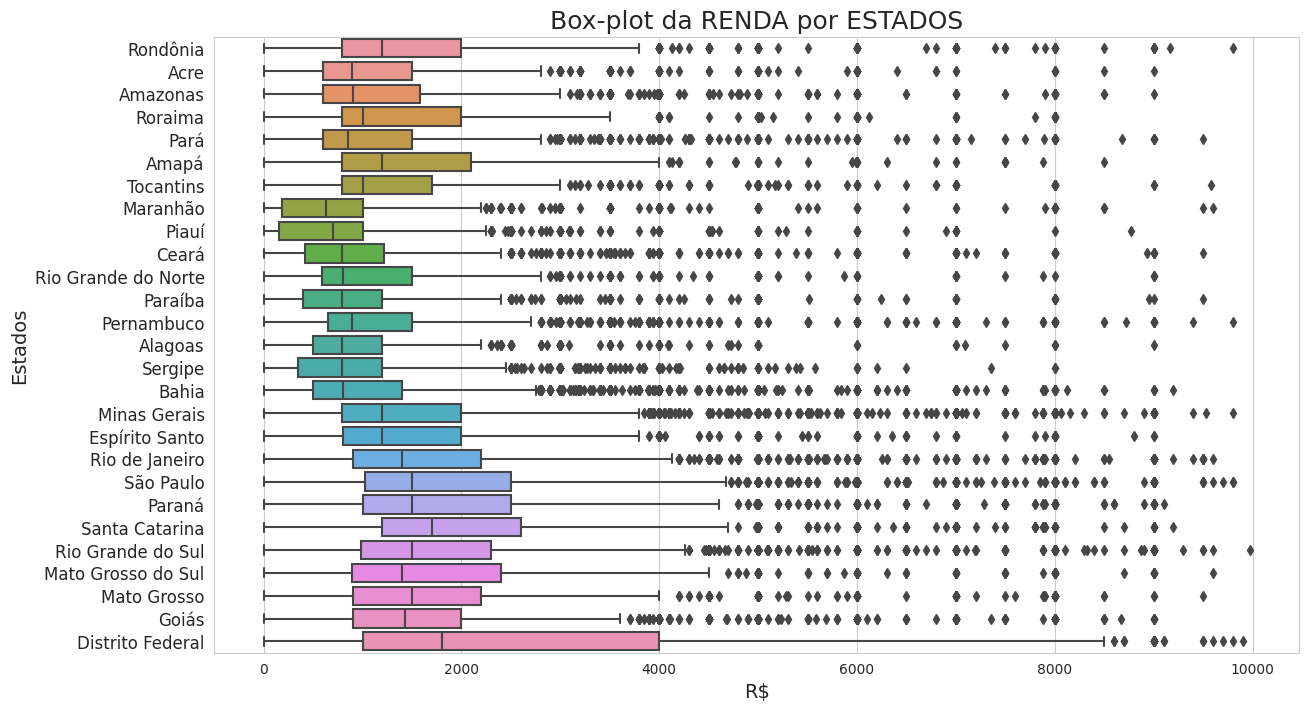

In [81]:
ax = sns.boxplot(x = 'Renda', y = 'UF', data=dados.query('Renda < 10000'), orient='h')

ax.figure.set_size_inches(14, 8)    # Personalizando o tamanho da figura

ax.set_title('Box-plot da RENDA por ESTADOS', fontsize=18)    # Configurando o título do gráfico

ax.set_xlabel('R$', fontsize=14)    # Configurando o label do eixo X

ax.set_ylabel('Estados', fontsize=14)    # Configurando o label do eixo Y
ax.set_yticklabels([key for key in uf.values()], fontsize=12)    # Configurando o label de cada categoria do eixo Y

ax

> ### Conclusões

Escreva suas conclusões aqui...